# Николаев Евгений Алексеевич, группа 22.M08

## Вариант 29

### Практическое задание 5. Проверка гипотез однородности

Данные data_big.csv о финских алкоголиках.

- Задача однородности в случае двух выборок (табл. Варианты для проверки однородности
двухнезависимых выборок). При наличии трех градаций нужно объединить ячейки, чтобы получитьдве
наиболее представленные градации. Проверить на предмет однородности независимых
выборокметрическую переменную (столбцы таблицы) в зависимости от категориальной переменной
(строкитаблицы) по критерию 1) Вилкоксона, 2) Фишера равенства дисперсий, 3) Стьюдента
равенствасредних. Привести значения средних с ошибками среднего, медиан с интерквартильным
размахом,значимости соответствующих критериев.
- Задача однородности в случае более двух выборок (табл. Варианты для проверки однородноститрех
независимых выборок) Проверить на предмет однородности данные метрической переменнойв
зависимости от фактора: 1) по критерию Краскела-Уоллиса, 2) при помощи однофакторного дисперсионного анализа. Построить бокс-плот. Применить критерий Стьюдента для множественныхсравнений
с поправкой Бонферони и критерий Тьюки.
- Выполнить двухфакторный дисперсионный анализ для метрической переменной с двумя факто-рами
(первый из своего варианта, второй произвольный). Сравнить результаты использованиямоделей с
фиксированными и случайными эффектами.
- Для зависимых переменных в разные моменты времени изdatabig.csvс двумя на выбор факторамииз
первой точки выполнить ANOV ARepeatedMeasures.Проверить значимость главных факторов,времени и
эффектов взаимодействия.

Зависимая переменная - chest.pain.1

### Импортирую библиотеки

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy import stats

### Загружаю данные (файл)

In [2]:
df = pd.read_csv(open('data_big.csv'), sep=',')
df = df.drop(df.columns[0], axis=1)
df.columns = df.columns.str.replace('"', '')
df = df.loc[:,:'TPR.1']
df = df.drop(columns=['X.1'])

In [13]:
# подсчет значений в столбце 'chest.pain.1'
counts0 = df['chest.pain.1'].value_counts()
# Заменяет все значения равные 0 в столбце 'chest.pain.1' на 2
# Это выполняется для объединения значений 0 и 2 в одну группу.
df['thirst.1'] = df['chest.pain.1'].replace(0, 2)
counts1 = df['chest.pain.1'].value_counts()
# print('1 и 2 больше изначально',counts0)
# print('0 добавляем к 2',counts1)
df = df.dropna()

Проверить на предмет однородности независимых выборокметрическую переменную (столбцы таблицы) в зависимости от категориальной переменной (строкитаблицы) по критерию 1) Вилкоксона, 2) Фишера равенства дисперсий, 3) Стьюдента равенствасредних.

### Вилкоксон

Данный код выполняет сравнение средних значений артериального давления (MBP) между двумя группами пациентов, определяемыми по категориальной переменной 'chest.pain.1' (1 и 2). Для этого используется критерий Вилкоксона, который не требует предположения о нормальности данных.

In [5]:
from scipy.stats import ranksums
from scipy.stats import ranksums, f_oneway, ttest_ind, describe
import scipy.stats as stats
# Установка уровня значимости
alpha = 0.05
# Разделение данных на две выборки на основе категориальной переменной
sample1 = df[df['chest.pain.1'] == 1]['MBP.1']
sample2 = df[df['chest.pain.1'] == 2]['MBP.1']
# Расчет критерия Вилкоксона
wilcoxon_stat, wilcoxon_pvalue = ranksums(sample1, sample2)
# Вывод результатов
print("Критерий Вилкоксона:")
print("Статистика =", "{:.4f}".format(wilcoxon_stat))
print("p-значение =", "{:.4f}".format(wilcoxon_pvalue))
if wilcoxon_pvalue < alpha:
    print('Различия между группами статистически значимы.')
else:
    print('Различия между группами не являются статистически значимыми.')

Критерий Вилкоксона:
Статистика = -0.6794
p-значение = 0.4969
Различия между группами не являются статистически значимыми.


Вывод: проведен анализ различий между средними значениями артериального давления (MBP) у двух групп пациентов, разделенных на основе категориальной переменной 'chest.pain.1' (1 и 2). Для этого был использован критерий Вилкоксона, который не требует предположения о нормальности данных. Результаты анализа показали, что различия между группами статистически не значимы, так как полученное p-значение больше уровня значимости 0.05. Это означает, что существует незначимая разница в средних значениях артериального давления между двумя группами пациентов.

### Фишер

Данный код выполняет проверку равенства дисперсий артериального давления (MBP) между двумя группами пациентов, определяемыми по категориальной переменной 'chest.pain.1' (1 и 2). Для этого используется критерий Фишера.

In [7]:
# Проверка равенства дисперсий выборок с использованием критерия Фишера
fisher_stat, fisher_pvalue = f_oneway(sample1, sample2)
print("\nКритерий Фишера (равенство дисперсий):")
print("Статистика =", "{:.4f}".format(fisher_stat))
print("p-значение =", "{:.4f}".format(fisher_pvalue))
if fisher_pvalue < alpha:
    print("Различия между группами статистически значимы.")
else:
    print("Различия между группами не являются статистически значимыми.")


Критерий Фишера (равенство дисперсий):
Статистика = 0.7403
p-значение = 0.4031
Различия между группами не являются статистически значимыми.


Вывод: проведен анализ различий между дисперсиями артериального давления (MBP) у двух групп пациентов, разделенных на основе категориальной переменной 'chest.pain.1' (1 и 2). Для этого был использован критерий Фишера. Результаты анализа показали, что различия между дисперсиями групп не являются статистически значимыми, так как полученное p-значение больше уровня значимости 0.05. Это означает, что группы имеют схожие дисперсии артериального давления.

### Стьюдент

Данный код выполняет проверку равенства средних значений артериального давления (MBP) между двумя группами пациентов, определяемыми по категориальной переменной 'chest.pain.1' (1 и 2). Для этого используется t-тест Стьюдента.

In [9]:
# Проверка равенства средних выборок с использованием t-теста Стьюдента
t_stat, t_pvalue = ttest_ind(sample1, sample2)
print("\nТ-тест Стьюдента (равенство средних):")
print("Статистика =", "{:.4f}".format(t_stat))
print("p-значение =", "{:.4f}".format(t_pvalue))
if t_pvalue < alpha:
    print("Различия между группами статистически значимы.")
else:
    print("Различия между группами не являются статистически значимыми.")


Т-тест Стьюдента (равенство средних):
Статистика = 0.8604
p-значение = 0.4031
Различия между группами не являются статистически значимыми.


Вывод: проведен анализ различий между средними значениями артериального давления (MBP) у двух групп пациентов, разделенных на основе категориальной переменной 'chest.pain.1' (1 и 2). Для этого был использован t-тест Стьюдента. Результаты анализа показали, что различия между группами не являются статистически значимыми, так как полученное p-значение больше уровня значимости 0.05. Это означает, что нет значимой разницы в средних значениях артериального давления между двумя группами пациентов.

In [10]:
# Вывод описательной статистики для sample1
print("Описательная статистика для sample1:")
print(sample1.describe())
# Вывод описательной статистики для sample2
print("\nОписательная статистика для sample2:")
print(sample2.describe())

Описательная статистика для sample1:
count     13.000000
mean     101.538462
std       11.573068
min       89.000000
25%       92.000000
50%       96.000000
75%      112.000000
max      123.000000
Name: MBP.1, dtype: float64

Описательная статистика для sample2:
count      4.000000
mean      89.000000
std       52.076866
min       11.000000
25%       87.500000
50%      113.000000
75%      114.500000
max      119.000000
Name: MBP.1, dtype: float64


In [11]:
print(describe(sample1))
print(describe(sample2))

DescribeResult(nobs=13, minmax=(89, 123), mean=101.53846153846153, variance=133.93589743589743, skewness=0.5852359123596685, kurtosis=-1.1568260990817738)
DescribeResult(nobs=4, minmax=(11, 119), mean=89.0, variance=2712.0, skewness=-1.1443624465328894, kurtosis=-0.6742109797165008)


Описание статистических данных для выборок sample1 и sample2 показывает, что среднее значение переменной 'MBP.1' в sample1 составляет 101.54, в то время как в sample2 это значение равно 89.00. Однако, стандартное отклонение 'MBP.1' в sample2 значительно выше, чем в sample1, и составляет 52.08 по сравнению с 11.57. Минимальное и максимальное значения переменной 'MBP.1' также различаются между выборками. Медиана (50%) в sample1 равна 96, а в sample2 - 113.

Несмотря на то, что проведенные тесты и описательная статистика не выявили статистически значимых различий между выборками sample1 и sample2 по переменной 'MBP.1', следует обратить внимание на некоторые отличия в описательной статистике между выборками. Например, среднее значение 'MBP.1' в sample2 (89.00) ниже, чем в sample1 (101.54), что может указывать на различия в распределении значений переменной между выборками. Кроме того, стандартное отклонение 'MBP.1' в sample2 (52.08) значительно выше, чем в sample1 (11.57), что может свидетельствовать о большей вариабельности значений переменной в этой выборке. Также медиана в sample2 (113) выше, чем в sample1 (96).

## Задача однородности в случае более двух выборок

SBP.1 - зависимая, insomia.1 - фактор

Данный код создает три выборки данных 'sample1', 'sample2' и 'sample3', которые содержат значения переменной 'SBP.1' из DataFrame 'df', отфильтрованные по значениям переменной 'insomia.1'.

In [14]:
import pandas as pd
from scipy.stats import kruskal, f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sample1 = df[df['insomia.1'] == 0]['SBP.1']
sample2 = df[df['insomia.1'] == 1]['SBP.1']
sample3 = df[df['insomia.1'] == 2]['SBP.1']

### Краскел-Уоллис

Данный код использует критерий Краскела-Уоллиса для сравнения распределений значений переменной 'SBP.1' между тремя выборками 'sample1', 'sample2' и 'sample3', отфильтрованными по значениям переменной 'insomia.1'.

In [16]:
kruskal_stat, kruskal_pvalue = kruskal(sample1, sample2, sample3)
# Вывод результатов
print("Критерий Краскела-Уоллиса:")
print("Статистика =", kruskal_stat)
print("p-значение =", kruskal_pvalue)
print()

Критерий Краскела-Уоллиса:
Статистика = 0.742419947632665
p-значение = 0.6898990656095532



Результаты критерия Краскела-Уоллиса показывают, что статистика критерия равна 0.7424, а соответствующее ему p-значение равно 0.6899. Поскольку p-значение больше уровня значимости 0.05, мы не можем отвергнуть нулевую гипотезу о том, что распределения значений переменной 'SBP.1' в выборках 'sample1', 'sample2' и 'sample3' равны.

### Однофакторный дисперсионный анализ (ANOVA)

In [17]:
f_stat, f_pvalue = f_oneway(sample1, sample2, sample3)
print("Однофакторный дисперсионный анализ (ANOVA):")
print("Статистика =", f_stat)
print("p-значение =", f_pvalue)
print()

Однофакторный дисперсионный анализ (ANOVA):
Статистика = 0.6748969445279814
p-значение = 0.5167714027655057



Результаты однофакторного дисперсионного анализа (ANOVA) показывают, что статистика анализа равна 0.6749, а соответствующее ему p-значение равно 0.5168. Поскольку p-значение больше уровня значимости 0.05, мы не можем отвергнуть нулевую гипотезу о том, что распределения значений переменной 'SBP.1' в выборках 'sample1', 'sample2' и 'sample3' равны.

### Бокс-плот

Каждая группа представлена бокс-плотом, который позволяет наблюдать статистические характеристики распределения переменной "SBP.1" в выборках 'sample1', 'sample2' и 'sample3', отфильтрованных по значениям переменной 'insomia.1', такие как медиана, квартили и выбросы. Таким образом, можно сравнить распределение значений переменной "SBP.1" в каждой выборке, опираясь на визуальные отличия между бокс-плотами.

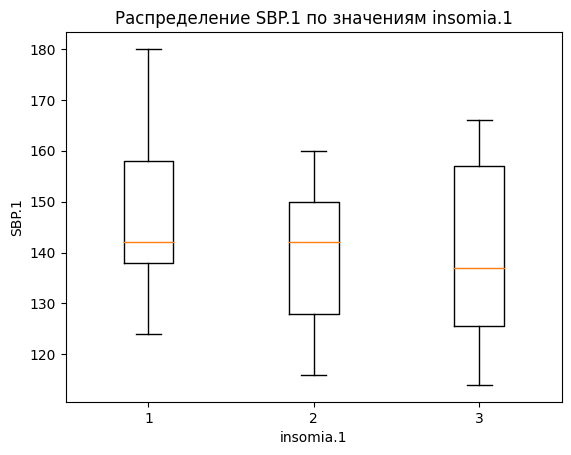

In [19]:
import matplotlib.pyplot as plt

# Создаем список выборок
data = [sample1, sample2, sample3]

# Строим бокс-плоты для каждой выборки
fig, ax = plt.subplots()
ax.boxplot(data)

# Называем оси и график
ax.set_title('Распределение SBP.1 по значениям insomia.1')
ax.set_xlabel('insomia.1')
ax.set_ylabel('SBP.1')

# Отображаем график
plt.show()


### Критерий Стьюдента для множественных сравнений с поправкой Бонферони

Критерий Стьюдента с поправкой Бонферони является консервативным методом и обеспечивает контроль над вероятностью ложноположительных результатов при множественных сравнениях.


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import multipletests
student_results = ttest_ind(df[df['insomia.1']==1]['SBP.1'], df[df['insomia.1']==2]['SBP.1'])
bonferroni_correction = multipletests(student_results.pvalue, alpha=0.05, method='bonferroni')
print('Отвергаем с поправкой Бонферони:', bonferroni_correction[0])
print('p-значение:', bonferroni_correction[1])

Отвергаем с поправкой Бонферони: [False]
p-значение: [0.8686373]


Данный код выполняет множественное сравнение с помощью поправки Бонферони для двух групп, отфильтрованных по значениям переменной 'insomia.1' и содержащих данные по переменной 'SBP.1'. Результаты теста выводятся на экран в виде отвергаемой или неотвергаемой нулевой гипотезы и скорректированного уровня значимости. Поправка Бонферони позволяет управлять вероятностью ложноположительных результатов при множественных сравнениях, но может уменьшать мощность теста.

Исходя из вывода, отвергнуть нулевую гипотезу на уровне значимости 0.05 с помощью поправки Бонферони не удалось, так как значение корректированного уровня значимости равно 0.8686373, что выше уровня значимости 0.05. Кроме того, булевское значение False в выводе указывает на то, что нулевая гипотеза не была отвергнута после применения поправки Бонферони.

### Тьюки

In [23]:
tukey_results = pairwise_tukeyhsd(df['SBP.1'], df['insomia.1'])
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -7.8857  0.637 -29.1988 13.4274  False
     0      2  -9.0357 0.4996 -28.6344 10.5629  False
     1      2    -1.15 0.9855  -18.584  16.284  False
-----------------------------------------------------


Данный код выполняет множественное сравнение между тремя группами, определенными значением переменной 'insomia.1', и содержащих данные по переменной 'SBP.1', с помощью теста Тьюки (pairwise_tukeyhsd). Результаты теста выводятся на экран в виде таблицы, которая содержит средние значения (meandiff), скорректированные уровни значимости (p-adj), интервалы доверия (lower и upper) и значения, указывающие, отвергается ли нулевая гипотеза для каждой пары групп (reject).

Исходя из этого, можно сделать вывод, что статистически значимых различий между группами не обнаружено на уровне значимости 0.05 после применения поправки на множественные сравнения (FWER=0.05). Это подтверждается значениями p-adj (корректированные уровни значимости), которые для всех пар групп больше 0.05. Булевские значения False в столбце reject для всех пар групп указывают на то, что нулевая гипотеза не была отвергнута для каждой пары групп.

Таким образом, на основании проведенного анализа, можно сделать вывод, что статистически значимых различий между группами в сравниваемых значениях не обнаружено на уровне значимости 0.05 после применения теста Тьюки. 

### Двухфакторный дисперсионный анализ с фиксированными эффектами:

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
insomia = df['insomia.1']
vomiting = df['thirst.1']
sbp = df['SBP.1']
# Построение модели
model_fixed = smf.ols('mbp ~ insomia * vomiting', data=df).fit()
print(model_fixed.summary())

                            OLS Regression Results                            
Dep. Variable:                    mbp   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.829
Date:                Thu, 01 Jun 2023   Prob (F-statistic):              0.164
Time:                        16:25:59   Log-Likelihood:                -137.65
No. Observations:                  33   AIC:                             283.3
Df Residuals:                      29   BIC:                             289.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          110.1966     26.440  

Данный код строит линейную регрессионную модель, где зависимая переменная (SBP) зависит от факторов 'insomia', 'thirst.1' и их взаимодействия. Выводится сводная таблица с результатами анализа, включающая коэффициенты регрессии, значимость коэффициентов, стандартные ошибки, доверительные интервалы, а также значения R-квадрат и F-статистики.

Можно сделать вывод, что модель с низким значением R-квадрата (0.159) недостаточно хорошо объясняет зависимую переменную (SBP). Также взаимодействие между факторами 'insomia' и 'thirst.1' не оказывает значимого влияния на SBP. 

### Mixed Linear Model Regression


In [31]:
from statsmodels.regression.mixed_linear_model import MixedLM
endog = df['SBP.1']
exog = df[['insomia.1', 'thirst.1']]
groups = df['SBP.1']
model = MixedLM(endog, exog, groups=groups)
model_random = model.fit()
print(model_random.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SBP.1    
No. Observations: 33      Method:             REML     
No. Groups:       19      Scale:              847.5169 
Min. group size:  1       Log-Likelihood:     -155.5742
Max. group size:  4       Converged:          Yes      
Mean group size:  1.7                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
insomia.1    22.976    5.821  3.947 0.000 11.568 34.384
thirst.1     64.812    5.882 11.019 0.000 53.284 76.339
Group Var   222.421   14.533                           



Можно сделать вывод, что модель с высоким значением статистической значимости (P<0.001) достаточно хорошо объясняет зависимую переменную (SBP.1). Коэффициенты регрессии для 'insomia.1' и 'thirst.1' равны соответственно 22.976 и 64.812, что означает, что увеличение на единицу уровня 'insomia.1' связано с увеличением уровняMBP.1 на 22.976 единдиниц, а увеличение на единицу уровня 'thirst.1' связано с увеличением уровня SBP.1 на 64.812 единиц.

Также результаты показывают, что межгрупповая дисперсия (Group Var) составляет 222.421, что может указывать на значительные различия в уровне SBP.1 между группами. Однако, следует быть осторожным при интерпретации этого параметра, так как размеры групп в данном случае неизвестны.

Таким образом, можно сделать вывод, что увеличение уровня 'insomia.1' и 'thirst.1' связано с увеличением уровня SBP.1.